In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# image = img.imread('lena_color.jif')
# image = img.imread('image_00002.jpg')
# new_image=image[:,:,:3]
# plt.imshow(new_image)
# plt.show()

In [36]:
import cv2
import numpy as np
import math
from PIL import Image, ImageStat

# I=sum(new_image[0,0,:])/3
# S=1-(min(new_image[0,0,:])/I)
# print(I,S)
# im = Image.fromarray(new_image)
# im.save("lena_color.jpg")

https://github.com/python-pillow/Pillow/tree/main/src/PIL

In [38]:
class _Enhance:
    def enhance(self, factor):
        return Image.blend(self.degenerate, self.image, factor)
    

class Contrast(_Enhance):
    def __init__(self, image):
        self.image = image
        mean = int(ImageStat.Stat(image.convert("L")).mean[0] + 0.5)
        self.degenerate = Image.new("P", image.size, mean).convert(image.mode)

        if "A" in image.getbands():
            self.degenerate.putalpha(image.getchannel("A"))
            
            
im = Image.open("test1.jpg")

#image brightness enhancer
enhancer = Contrast(im)


factor = 3 #increase  constrast
im_output = enhancer.enhance(factor)
print(np.array(im)[0,0,:],np.array(im_output)[0,0,:])
im_output.save('contrast-image.jpg')

[61 61 61] [0 0 0]


https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/

In [8]:
import cv2
import numpy as np
  
# Open the image.
img = cv2.imread('lena_color.jpg')
  
# Trying 4 gamma values.
for gamma in [0.5,2,3]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  
    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/median_filter.py

In [13]:
from numpy import divide, int8, multiply, ravel, sort, zeros_like

def median_filter(gray_img, mask=3):
    # set image borders
    bd = int(mask / 2)
    # copy image size
    median_img = zeros_like(gray_img)
    for i in range(bd, gray_img.shape[0] - bd):
        for j in range(bd, gray_img.shape[1] - bd):
            # get mask according with mask
            kernel = ravel(gray_img[i - bd : i + bd + 1, j - bd : j + bd + 1])
            # calculate mask median
            median = sort(kernel)[int8(divide((multiply(mask, mask)), 2) + 1)]
            median_img[i, j] = median
    return median_img

img = cv2.imread('noise_image.jpg')
new_img=median_filter(img,9)
cv2.imwrite('lena9.jpg', new_img)

# def gaussian_noise(img, mean=0, sigma=0.1):

#     # int -> float (標準化)
#     img = img / 255
#     # 隨機生成高斯 noise (float + float)
#     noise = np.random.normal(mean, sigma, img.shape)
#     # noise + 原圖
#     gaussian_out = img + noise
#     # 所有值必須介於 0~1 之間，超過1 = 1，小於0 = 0
#     gaussian_out = np.clip(gaussian_out, 0, 1)

#     # 原圖: float -> int (0~1 -> 0~255)
#     gaussian_out = np.uint8(gaussian_out*255)
    
#     return gaussian_out

# img = cv2.imread('lena_gray.jpg')
# # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# noise_img=gaussian_noise(img)
# noise_img=Image.fromarray(noise_img)
# noise_img.save("noise_image.jpg")

True

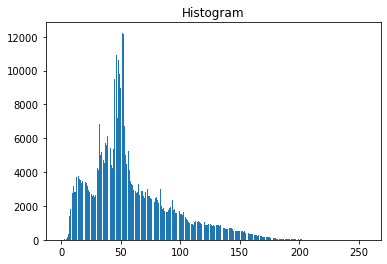

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from collections import Counter

# 讀取圖檔
img = cv2.imread('test.jpg')

# 轉為灰階圖片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

piexl=np.zeros(shape=(256,),dtype=int)
for i in gray.reshape(-1,):
    piexl[i]+=1


plt.bar(range(256),piexl)
plt.title('Histogram')
plt.savefig('./historgram.jpg')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


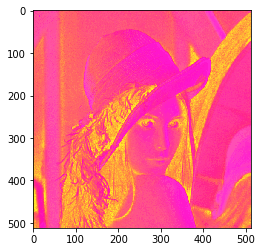

In [38]:
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi
    
    
# Import picture & create HSI copy using algorithm

hsi = RGB_TO_HSI(new_image)
plt.imshow(hsi)
plt.show()
# # Display HSV Image
# cv2.imshow('HSI Image', hsi)

# # The three value channels
# cv2.imshow('H Channel', hsi[:, :, 0])
# cv2.imshow('S Channel', hsi[:, :, 1])
# cv2.imshow('I Channel', hsi[:, :, 2])

# # Wait for a key press and then terminate the program
# cv2.waitKey(0)
# cv2.destroyAllWindows()